# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [4]:
import scipy.io
mat = scipy.io.loadmat('data/ejer_1_data1.mat')

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [5]:
mat['X']

array([[1.9643  , 4.5957  ],
       [2.2753  , 3.8589  ],
       [2.9781  , 4.5651  ],
       [2.932   , 3.5519  ],
       [3.5772  , 2.856   ],
       [4.015   , 3.1937  ],
       [3.3814  , 3.4291  ],
       [3.9113  , 4.1761  ],
       [2.7822  , 4.0431  ],
       [2.5518  , 4.6162  ],
       [3.3698  , 3.9101  ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.2638  , 4.3706  ],
       [2.6555  , 3.5008  ],
       [3.1855  , 4.2888  ],
       [3.6579  , 3.8692  ],
       [3.9113  , 3.4291  ],
       [3.6002  , 3.1221  ],
       [3.0357  , 3.3165  ],
       [1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [1.9527  , 2.7843  ],
       [2.2753  , 2.7127  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [3.0473  , 2.2931  ],
       [2.4827  , 2.0373  ],
       [2.5057  , 2.3853  ],
       [1.8721  , 2.0577  ],
       [2.0103  , 2.3546  ],
       [1.2269  , 2.3239  ],
       [1.8951  , 2.9174  ],
       [1.561   , 3.0709  ],
       [1.5495

#### 3. Create a DataFrame with the features and target

In [4]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']
df

,x1,x2,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      51 non-null     float64
 1   x2      51 non-null     float64
 2   y       51 non-null     uint8  
dtypes: float64(2), uint8(1)
memory usage: 999.0 bytes


In [8]:
df.describe()

,x1,x2,y
count,51.000000,51.000000,51.000000
mean,2.268780,3.132512,0.411765
std,0.928531,0.753256,0.497050
min,0.086405,1.617700,0.000000
25%,1.572550,2.636000,0.000000
50%,2.275300,3.070900,0.000000
75%,2.955050,3.531400,1.000000
max,4.015000,4.616200,1.000000


In [9]:
df['y'].value_counts()

0    30
1    21
Name: y, dtype: int64

#### 4. Plot a scatterplot with the data

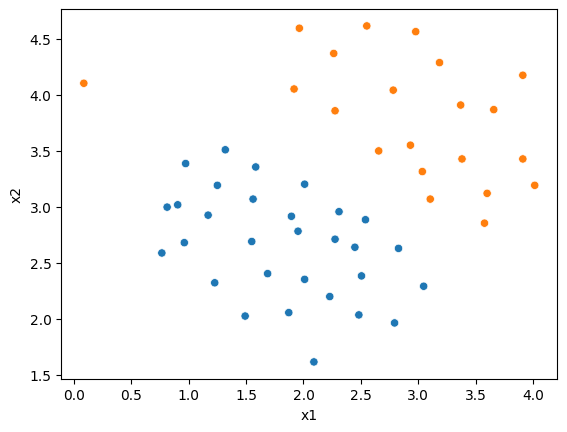

In [11]:
sns.scatterplot(data=df, x="x1", y="x2", hue="y", legend=False);

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [19]:
from sklearn.svm import LinearSVC

svc_1 = LinearSVC(C=1, loss="hinge", max_iter=10000)

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [20]:
X = df[['x1','x2']]
y =  df['y']

svc_1.fit(X, y)
svc_1.score(X, y)

0.9803921568627451

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [7]:
svc_2 = LinearSVC(C=500, loss="hinge", max_iter=1000000)
svc_2.fit(X, y)
svc_2.score(X, y)

1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [9]:
conf_level = svc_1.decision_function(X)
conf_level

array([ 0.80285088,  0.3839309 ,  1.37751205,  0.52118964,  0.33342764,
        0.86872589,  0.68654483,  1.61123399,  0.83450269,  1.16715271,
        1.07326205,  0.2298281 ,  0.33184317,  0.7958276 ,  0.31581715,
        1.27411378,  1.21021721,  1.        ,  0.56476975,  0.38991553,
       -0.43521049, -0.3087811 , -0.68619199, -0.55394915, -0.33243755,
       -0.29376247, -0.44062139, -0.98391165, -0.68555474, -1.32841149,
       -1.00372223, -1.49225222, -0.6113552 , -0.6833859 , -0.99997865,
       -1.15268008, -1.57835215, -1.35593432, -1.0323462 , -1.18499706,
       -0.77136415, -0.76687244, -0.46644785, -0.99991835, -0.51025931,
       -0.8585533 , -1.55895488, -0.2548162 , -1.11360141, -1.54714771,
       -0.70991771])

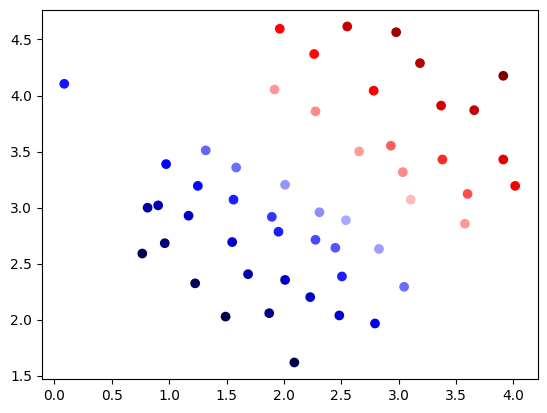

In [11]:
plt.scatter(df['x1'], df['x2'], c=conf_level, cmap="seismic")

#### 9. Do the same with the second model

In [12]:
conf_level = svc_2.decision_function(X)
conf_level

array([ 11.68945354,   5.92499183,  14.77818843,   5.27590079,
         1.00011306,   5.57190975,   5.63714559,  14.29188485,
         9.31018506,  13.8321657 ,  10.03685501,   1.4122135 ,
         6.53225295,  10.60830872,   3.8849734 ,  12.91836026,
        10.61745259,   7.39916873,   3.53194975,   3.4486418 ,
        -0.99990252,  -1.        ,  -5.06326332,  -4.65122131,
        -2.26904712,  -3.56717078,  -5.95589925, -10.19362378,
        -6.90607966, -12.03575569,  -8.83665837, -11.72489449,
        -4.02665489,  -3.72122927,  -7.25288582,  -9.4375254 ,
       -13.58234872,  -9.30148058,  -6.34596718,  -6.87272857,
        -2.74791702,  -3.62226648,  -0.46562833,  -9.52606968,
        -4.73696164,  -9.82074428, -15.36783621,  -2.16451121,
        -6.37606493, -10.80254571,   0.91267915])

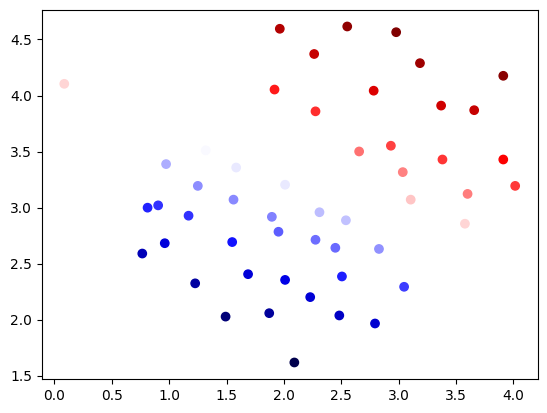

In [13]:
plt.scatter(df['x1'], df['x2'], c=conf_level, cmap="seismic")

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

y = ax1 + bx2 + c

0 = ax1 + bx2 + c

bx2 = -ax1 - c

x2 = -ax1/b - c/b

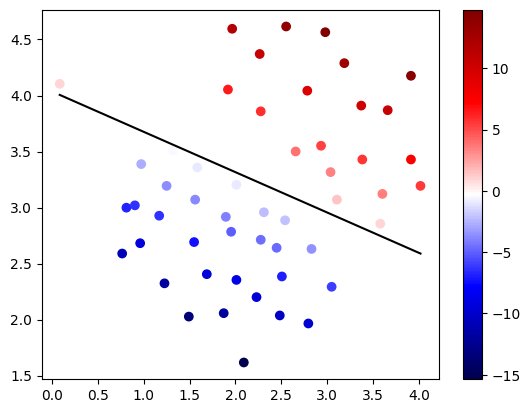

In [16]:
w = svc_2.coef_[0]
b =  svc_2.intercept_
x_points = df['x1'].sort_values()
y_points = -w[0]/w[1] * x_points - b/w[1]

plt.scatter(df['x1'], df['x2'], c=conf_level, cmap="seismic")
plt.plot(x_points, y_points, c='k')
plt.colorbar()

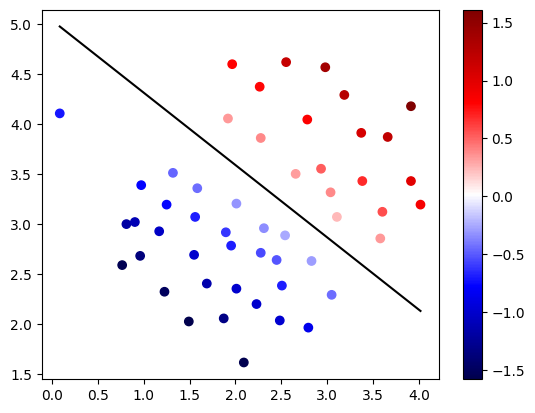

In [21]:
w = svc_1.coef_[0]
b =  svc_1.intercept_
x_points = df['x1'].sort_values()
y_points = -w[0]/w[1] * x_points - b/w[1]
conf_level = svc_1.decision_function(X)

plt.scatter(df['x1'], df['x2'], c=conf_level, cmap="seismic")
plt.plot(x_points, y_points, c='k')
plt.colorbar()

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [5]:
mat = scipy.io.loadmat('data/ejer_1_data2.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

In [27]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 2. Create a DataFrame with the features and target

In [6]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']
df

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


#### 3. Plot a scatterplot with the data

<Axes: xlabel='x1', ylabel='x2'>

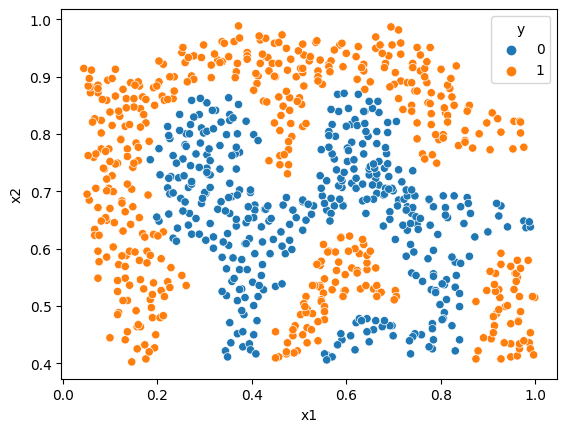

In [29]:
sns.scatterplot(data=df, x="x1", y="x2", hue="y")

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [17]:
from sklearn.svm import SVC

svc = SVC(C=100, gamma=10, probability=True)

#### 5. Fit the classifier and get the score

In [18]:
X = df[['x1','x2']]
y = df['y']

svc.fit(X,y)

SVC(C=100, gamma=10, probability=True)

In [19]:
svc.score(X,y)

0.9698725376593279

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [20]:
y_pred_proba = svc.predict_proba(X)
y_pred_proba[:,1]

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.99999461e-01,
       9.94897799e-01, 9.99985232e-01, 9.99999933e-01, 9.90469666e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.88822665e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       7.52323531e-01, 4.14537090e-01, 1.00000000e+00, 1.00000000e+00,
       9.86893325e-01, 9.99991553e-01, 9.92232280e-01, 8.81825197e-01,
       9.83231958e-01, 9.99998290e-01, 9.99999157e-01, 9.99999813e-01,
       9.99997489e-01, 9.78938467e-01, 8.42720985e-01, 9.73982128e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.99999997e-01, 9.99999873e-01,
       9.99991668e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

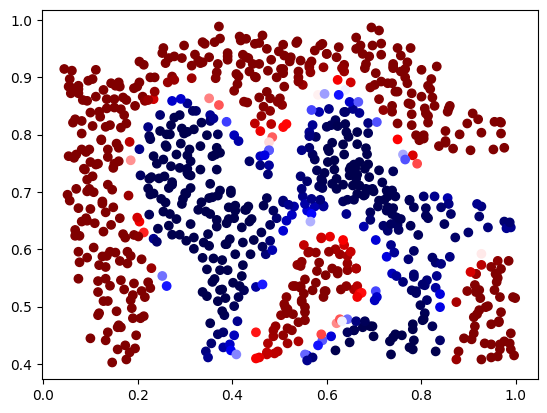

In [21]:
plt.scatter(df['x1'], df['x2'], c=y_pred_proba[:,1], cmap="seismic")

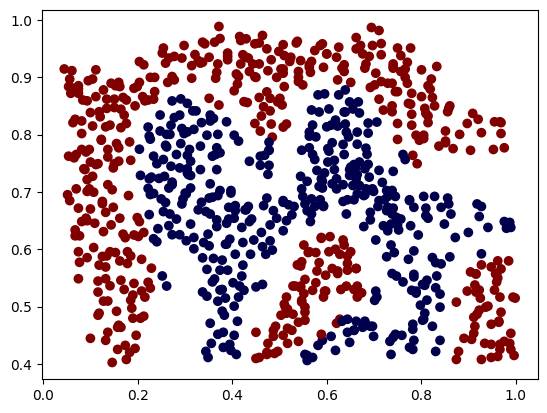

In [22]:
plt.scatter(df['x1'], df['x2'], c=svc.predict(X), cmap="seismic")

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(690, 2)
(173, 2)
(690,)
(173,)


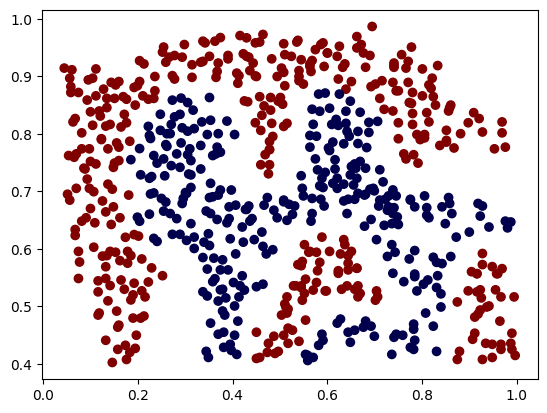

In [12]:
plt.scatter(X_train['x1'], X_train['x2'], c=y_train, cmap="seismic")

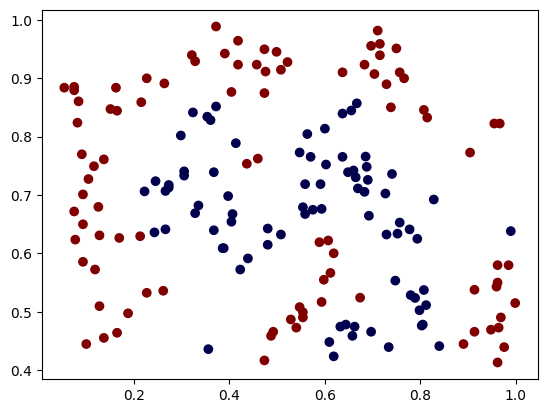

In [77]:
plt.scatter(X_test['x1'], X_test['x2'], c=y_test, cmap="seismic")

In [13]:
parameters = {"kernel": ["rbf", "poly"],
              "C": [0.1,1,10,100],
              }

gs = GridSearchCV(svc, parameters, cv=5, scoring="accuracy", n_jobs=-1, verbose=3)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=SVC(C=1, gamma=10, probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=3)

In [14]:
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

SVC(C=100, gamma=10, probability=True)
{'C': 100, 'kernel': 'rbf'}
0.9550724637681158


In [15]:
final_model = gs.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [16]:
from sklearn.model_selection import cross_val_score

results_cv = cross_val_score(final_model, X, y, cv=10, scoring="accuracy")
print(results_cv)
print(results_cv.mean())
print(results_cv.std())

[0.95402299 0.97701149 0.97701149 0.98837209 0.98837209 0.70930233
 0.90697674 0.8255814  0.74418605 0.76744186]
0.8838278535151028
0.1056342507795171


In [24]:
final_model

SVC(C=100, gamma=10, probability=True)